Introduction

Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

Data Collection/Curation + Parsing

    Before we do any type of data science we must do two things:
        1) Get data
        2) Parse data
    
    Data comes in the form of datasets which can be created or found *(I'll list some resources at the bottom for finding datasets). In this case we will be using following two datasets:
    
        Table D-1. Historical Median Income Using Alternative Price Indices: 1967 to 2021
        https://www2.census.gov/programs-surveys/demo/tables/p60/276/tableD1.xlsx

    
        Table 330.10. Average undergraduate tuition, fees, room, and board rates charged for full-time students in degree-granting postsecondary institutions, by level and control of institution: Selected years, 1963-64 through 2020-21
        https://nces.ed.gov/programs/digest/d21/tables/xls/tabn330.10.xls

    If you open up these files you'll notice that they aren't just datasets. They both have headers and footnotes which we don't want. To adjust for this we parse the data. Parsing is the act of fitting files into our use case. In order to parse our excel files into dataframes we will be using the pandas 'read_excel()' function to extract the data and ignore the header and footnotes.

    <-- Resources -->
    Free resources for finding Datasets:
    https://www.kaggle.com/
    https://datasetsearch.research.google.com/
    https://en.wikipedia.org/wiki/List_of_open_government_data_sites

    You can also often find datasets directly on the sites of organizations.



In [2]:
# Parsing excel data into a pandas dataframe (Skipping the header and footnotes)
# NOTE: We are also cutting off some data in the 'df_college_cost' that will wont be using for this tutorial. 
df_median_income = pd.read_excel('https://www2.census.gov/programs-surveys/demo/tables/p60/276/tableD1.xlsx', skiprows=5, skipfooter=26)
df_college_cost = pd.read_excel('https://nces.ed.gov/programs/digest/d21/tables/xls/tabn330.10.xls', skiprows=[0,1,2,4], skipfooter=53)

# We'll display the heads of the table so we can get an idea of what they currently look like
display(df_median_income.head())
display(df_college_cost.head())

,Unnamed: 0,Estimate,Margin of\nerror1 (±),Estimate.1,Margin of\nerror1 (±).1,Estimate.2,Margin of\nerror1 (±).2,Estimate.3,Margin of\nerror1 (±).3
0,2021,70784.000000,605.000000,70784.00,605.0,70784.000000,605.000000,70784.000000,605
1,2020 2,68010.283709,879.912782,71186.00,921.0,71117.409473,920.112580,71117.409473,920
2,2019,68702.748083,904.921053,72808.49,959.0,72612.823597,956.422772,72612.823597,956
3,2018,63179.264160,691.405514,68168.00,746.0,67745.710038,741.378648,67745.710038,741
4,2017 3,61135.666667,529.285714,67571.00,585.0,66877.413663,578.995235,66877.413663,579


,Unnamed: 0,All insti-tutions,4-year,2-year,All insti-tutions.1,4-year.1,2-year.1,All insti-tutions.2,4-year.2,2-year.2,...,2-year.4,All insti-tutions.5,4-year.5,2-year.5,All insti-tutions.6,4-year.6,2-year.6,All insti-tutions.7,4-year.7,2-year.7
0,All institutions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1963-64,10647.560685,10973.419962,6616.176052,4336.485596,4714.725456,1461.132123,2408.995351,2377.060276,1784.429953,...,775.433503,508.247693,552.578415,171.248587,282.340689,278.597813,209.139956,457.334166,454.937898,395.044960
2,1968-69,10761.619228,11400.863864,7768.613279,4399.734947,5041.302500,1847.435646,2658.026787,2656.948648,2411.736521,...,1052.943480,596.331940,683.288820,250.398012,360.264036,360.117907,326.882309,502.013997,501.845282,475.663160
3,1969-70,10867.658503,11664.805710,7588.871723,4494.224441,5259.592862,1723.750009,2711.470481,2729.899729,2416.688472,...,1089.373133,645.140350,755.008039,247.442178,389.228228,391.873724,346.912636,525.670335,527.586644,495.018319
4,1970-71,10947.894604,11819.924047,7421.699083,4557.678257,5390.787280,1652.395594,2774.404823,2794.910341,2447.272193,...,1120.371939,688.022348,813.787615,249.443912,418.821253,421.916745,369.437653,545.839130,548.619024,501.490373


Data Management/Representation

    It's important to note that parsing data doesn't always work perfectly and this case is an example of that. If you look at the source excel files you'll notice a handful of issues in our dataframes:
        - Almost all values have turned into a float approximation of our integers
        - We've lost the column group names
        - Some of the years in 'df_median_income' have extra characters

    In addition to these errors we also have some formatting issues:
        - 'df_median_income's year column is in descending order, unlike 'df_college_cost'
        - 'df_median_income' has some repeating years (We'll show this later)
        - 'df_college_cost's year column is an interval
        - 'df_college_cost' has labels in rows
        - Both dataframes have bad column names
        
    Before we do any kind of exploratory analysis we must address these issues, and the best way to start is by getting rid of the columns we don't need.


    For our 'df_median_income' we will only be using the first three columns: Year, Current Dollars- Estimate, and Current Dollars- Margin of error.

    For our 'df_college_cost' we will only use the 1st, 14th, 17th, 20th, and 23rd columns which represent the current dollars estimate cost for all institutions (2 and 4 year) in regards to total cost, only tuition and fees, only dormitory rooms, and only board.

In [3]:
# Dropping columns from df_median_income
df_median_income.drop(columns=df_median_income.columns[3:], inplace=True)

# Renaming Columns
df_median_income.columns = ['Year', 'Estimate', 'Error']

# Displaying head of Dataframe so we can see changes
df_median_income.head()

,Year,Estimate,Error
0,2021,70784.000000,605.000000
1,2020 2,68010.283709,879.912782
2,2019,68702.748083,904.921053
3,2018,63179.264160,691.405514
4,2017 3,61135.666667,529.285714


In [4]:
# Dropping columns from df_college_cost
df_college_cost.drop(columns=df_college_cost.columns[1:13], inplace=True)

four_year_columns = df_college_cost.columns[2::3]
two_year_columns = df_college_cost.columns[3::3]

df_college_cost.drop(columns=four_year_columns, inplace=True)
df_college_cost.drop(columns=two_year_columns, inplace=True)

# Renaming Columns
df_college_cost.columns = ['Year', 'Total', 'Tuition_and_Fees', 'Dormitory', 'Board']

# Displaying head of Dataframe so we can see changes
df_college_cost.head()

,Year,Total,Tuition_and_Fees,Dormitory,Board
0,All institutions,NaN,NaN,NaN,NaN
1,1963-64,1247.922549,508.247693,282.340689,457.334166
2,1968-69,1458.609973,596.331940,360.264036,502.013997
3,1969-70,1560.038913,645.140350,389.228228,525.670335
4,1970-71,1652.682730,688.022348,418.821253,545.839130


    Now that we've further isolated our dataframes we can start fixing the errors and formatting issues.

    Let's start by fixing the values for 'df_median_income'. 

In [5]:
# Removing extra characters from 'Year' column and changing type to integer
df_median_income['Year'] = df_median_income['Year'].astype(str).str.slice(0,4)
df_median_income = df_median_income.apply(pd.to_numeric)

# Turning the float approximations back into integers
df_median_income = df_median_income.apply(lambda value: round(value,0))
df_median_income = df_median_income.astype(int)

# Sorting dataframe by year in ascending order
df_median_income.sort_values(by=['Year'], inplace=True)

# Displaying head of Dataframe so we can see changes
df_median_income.head()

,Year,Estimate,Error
56,1967,7143,43
55,1968,7743,46
54,1969,8389,51
53,1970,8734,53
52,1971,9028,58


    Next we can get rid of the duplicate years.

In [6]:
# Finding duplicate years
df_median_income[df_median_income['Year'].duplicated(keep=False)]

,Year,Estimate,Error
10,2013,51939,454
9,2013,53585,1076
5,2017,61372,551
4,2017,61136,529


In [7]:
# We'll chose to keep the first of each duplicate year
df_median_income.drop_duplicates(subset=['Year'], keep='first', inplace=True)

# Confirming the dropping of duplicate years (should be empty).
df_median_income[df_median_income['Year'].duplicated(keep=False)]

,Year,Estimate,Error


    Lastly let's reset the index as our changes have mixed it up

In [8]:
# Reset index to make the dataframe easier to work with
df_median_income.reset_index(drop=True, inplace=True)

# Displaying head of dataframe
df_median_income.head()

,Year,Estimate,Error
0,1967,7143,43
1,1968,7743,46
2,1969,8389,51
3,1970,8734,53
4,1971,9028,58


    Now that we've fixed all the issues with 'df_median_income' we can start fixing the issues with 'df_college_cost'.

    the 'df_college_cost' dataframe is actually a three dataset put together (All Institutions, Public Institutions, and Private Institutions). We'll start by finding and deleting the labels for these datasets, this will allow us to fix the issues with the data, then we can split each dataset into it's own dataframe.

In [9]:
# Finding the row locations for the labels of the three datasets
df_college_cost[df_college_cost['Year'].astype(str).str.match(r'^\D')]

,Year,Total,Tuition_and_Fees,Dormitory,Board
0,All institutions,NaN,NaN,NaN,NaN
55,Public insti-\n tutions,NaN,NaN,NaN,NaN
110,Private \n nonprofit and\n for-profit\n ...,NaN,NaN,NaN,NaN


In [10]:
# Removing labels
df_college_cost.drop([0,55,110], inplace=True)

# Checking to see if we've removed all labels (should be empty)
df_college_cost[df_college_cost['Year'].astype(str).str.match(r'^\D')]

,Year,Total,Tuition_and_Fees,Dormitory,Board


In [11]:
# Fixing the format of the 'Year' column by only taking the first year of the interval 
# and parsing it as an int
df_college_cost['Year'] = df_college_cost['Year'].astype(str).str.slice(0,4)
df_college_cost = df_college_cost.apply(pd.to_numeric)

# Turning the float approximations back into integers
df_college_cost = df_college_cost.apply(lambda values: round(values,0))
df_college_cost = df_college_cost.astype(int)

# Displaying head of Dataframe so we can see changes
df_college_cost.head()

,Year,Total,Tuition_and_Fees,Dormitory,Board
1,1963,1248,508,282,457
2,1968,1459,596,360,502
3,1969,1560,645,389,526
4,1970,1653,688,419,546
5,1971,1730,724,445,562


    Now that we've fixed all the issues with 'df_college_cost' we can split each dataset into it's own dataframe and reset their indexes.

In [12]:
# Splitting Dataset into different tables
df_college_cost_all = df_college_cost[:54]
df_college_cost_public = df_college_cost[54:108]
df_college_cost_private = df_college_cost[108:]

# Resting the indexes to make the new datasets easier to work with
df_college_cost_all.reset_index(drop=True, inplace=True)
df_college_cost_public.reset_index(drop=True, inplace=True)
df_college_cost_private.reset_index(drop=True, inplace=True)

    The last thing we want to do merge all of our new dataframes with the 'df_median_income' dataframe. We do this as it allows us to contain all relevant information into a single dataframe, making it easier to work with.

In [13]:
# Merging Dataframes on Year
df_college_cost_all = df_college_cost_all.merge(df_median_income, how='inner', on='Year')
df_college_cost_public = df_college_cost_public.merge(df_median_income, how='inner', on='Year')
df_college_cost_private = df_college_cost_private.merge(df_median_income, how='inner', on='Year')

# Turning 'df_college_cost' into a list of all three dataframes
df_college_cost = [df_college_cost_all, df_college_cost_public, df_college_cost_private]

Exploratory Data Analysis

    Now that we have all of our data ready we can start 

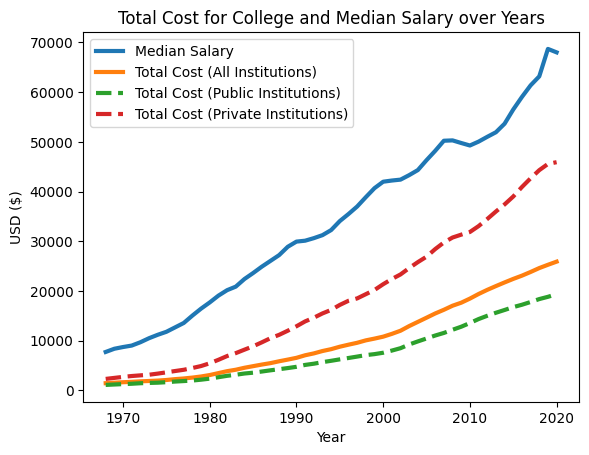

In [14]:
# Plotting median salary
plt.plot(
    df_college_cost_all['Year'],
    df_college_cost_all['Estimate'],
    linewidth= 3
)

# Plotting the total costs for each type of institution
for idx, df in enumerate(df_college_cost):
    plot = plt.plot(
        df['Year'],
        df['Total'],
        linewidth= 3
    )

    # Changing line style to distinguish types
    if idx > 0:
        plt.setp(plot, linestyle='--')

            
# Labeling plot
plt.xlabel('Year')
plt.ylabel('USD ($)')
plt.title('Total Cost for College and Median Salary over Years')
plt.legend(['Median Salary', 
            'Total Cost (All Institutions)', 
            'Total Cost (Public Institutions)', 
            'Total Cost (Private Institutions)'])

# Displaying plot
plt.show()

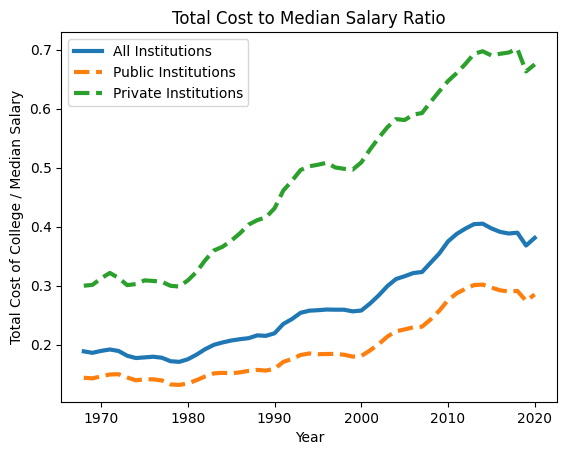

In [15]:
# Plotting total cost to median salary ratios for each type of institution
for idx, df in enumerate(df_college_cost):

    plot = plt.plot(
        df['Year'],
        df['Total'] / df['Estimate'],
        linewidth=3,
    )

    # Changing line style to distinguish types
    if idx > 0:
        plt.setp(plot, linestyle='--')
    

    # Labeling plot
    plt.title('Total Cost to Median Salary Ratio')
    plt.xlabel('Year')
    plt.ylabel('Total Cost of College / Median Salary')
    plt.legend(['All Institutions', 'Public Institutions', 'Private Institutions'])

# Displaying plot
plt.show()

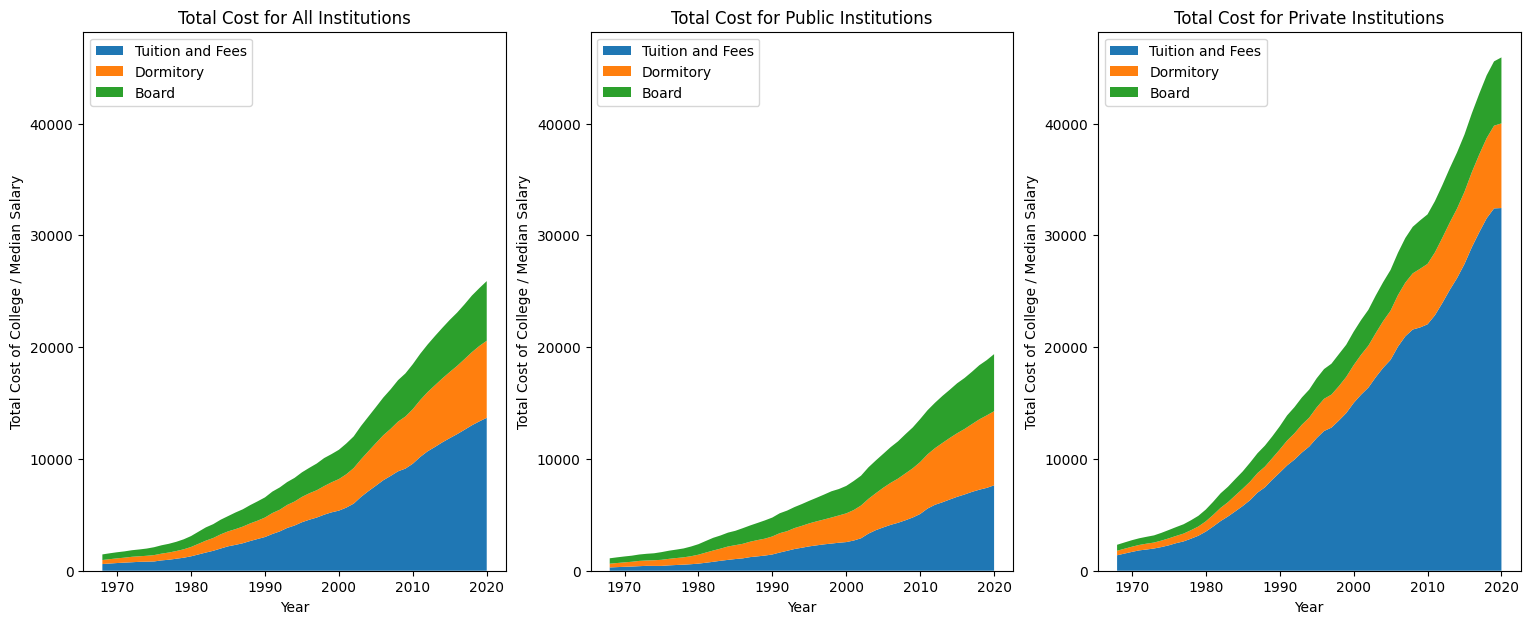

In [16]:
# Creating frames for subplot
fig, axes = plt.subplots(1,3, figsize=(5,7), sharey=True)

# Creating titles for each plot
fig_titles = ['Total Cost for All Institutions',
              'Total Cost for Public Institutions',
              'Total Cost for Private Institutions']

# Plotting total cost stackplot for each type of institution
for idx, df in enumerate(df_college_cost):
    plot = fig.axes[idx].stackplot(
        df['Year'],
        df['Tuition_and_Fees'],
        df['Dormitory'],
        df['Board']
    )

    # Labeling plot
    fig.axes[idx].set_title(fig_titles[idx])
    fig.axes[idx].set_xlabel('Year')
    fig.axes[idx].set_ylabel('Total Cost of College / Median Salary')
    fig.axes[idx].legend(['Tuition and Fees', 'Dormitory', 'Board'], loc='upper left')
    fig.axes[idx].yaxis.set_tick_params(labelleft=True)

# Adjusting spacing for subplots
fig.subplots_adjust(right=3)

# Displaying plots
plt.show()

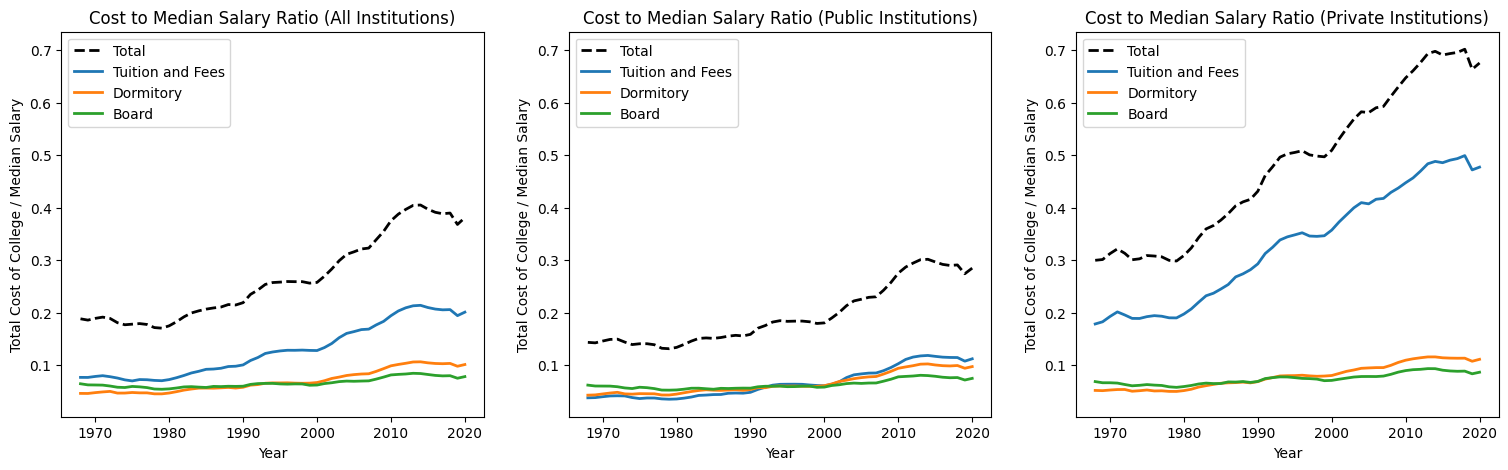

In [17]:
# Creating frames for subplot
fig, axes = plt.subplots(1,3, figsize=(5, 5), sharey=True)

# Creating titles for each plot
fig_titles = ['Cost to Median Salary Ratio (All Institutions)',
              'Cost to Median Salary Ratio (Public Institutions)',
              'Cost to Median Salary Ratio (Private Institutions)']

# Plotting ratios to median salary for each type of cost, for each type of institution
for idx, df in enumerate(df_college_cost):

    # Plotting total cost ratio
    fig.axes[idx].plot(
        df['Year'],
        df['Total'] / df['Estimate'],
        linewidth=2,
        color='k',
        linestyle='--'
    )

    # plotting Tuition and Fees ratio
    fig.axes[idx].plot(
        df['Year'],
        df['Tuition_and_Fees'] / df['Estimate'],
        linewidth=2
    )

    # PLotting Dormitory ratio
    fig.axes[idx].plot(
        df['Year'],
        df['Dormitory'] / df['Estimate'],
        linewidth=2
    )

    # Plotting Board ratio
    fig.axes[idx].plot(
        df['Year'],
        df['Board'] / df['Estimate'],
        linewidth=2
    )

    # Labeling plots
    fig.axes[idx].set_title(fig_titles[idx])
    fig.axes[idx].set_xlabel('Year')
    fig.axes[idx].set_ylabel('Total Cost of College / Median Salary')
    fig.axes[idx].legend(['Total', 'Tuition and Fees', 'Dormitory', 'Board'], loc='upper left')
    fig.axes[idx].yaxis.set_tick_params(labelleft=True)

# Adjusting spacing for subplots
fig.subplots_adjust(right=3)

# Displaying plots
plt.show()

Hypothesis Testing

In [18]:
# Creating total cost top median salary ratio columns for each type of institution
for df in df_college_cost:
    df['Ratio'] = df['Total'] / df['Estimate']

# Modeling linear regression
model_all_institutions = smf.ols(formula='Ratio ~ Year', data=df_college_cost_all).fit()

# Displaying 'All Institutions' model results
print('\n------------------------------------------------\
    \nAll Institutions Hypothesis Testing\n\
------------------------------------------------\n')

print(model_all_institutions.summary())


------------------------------------------------    
All Institutions Hypothesis Testing
------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:                  Ratio   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     503.5
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           4.36e-28
Time:                        22:44:21   Log-Likelihood:                 122.77
No. Observations:                  53   AIC:                            -241.5
Df Residuals:                      51   BIC:                            -237.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025    

In [19]:
# Modeling linear regression
model_public_institutions = smf.ols(formula='Ratio ~ Year', data=df_college_cost_public).fit()

# Displaying 'All Institutions' model results
print('\n------------------------------------------------\
    \nPublic Institutions Hypothesis Testing\n\
------------------------------------------------\n')

print(model_public_institutions.summary())


------------------------------------------------    
Public Institutions Hypothesis Testing
------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:                  Ratio   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     317.1
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           1.55e-23
Time:                        22:44:21   Log-Likelihood:                 129.41
No. Observations:                  53   AIC:                            -254.8
Df Residuals:                      51   BIC:                            -250.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025 

In [20]:
# Modeling linear regression
model_private_institutions = smf.ols(formula='Ratio ~ Year', data=df_college_cost_private).fit()

# Displaying 'All Institutions' model results
print('\n------------------------------------------------\
    \nPrivate Institutions Hypothesis Testing\n\
------------------------------------------------\n')

print(model_private_institutions.summary())


------------------------------------------------    
Private Institutions Hypothesis Testing
------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:                  Ratio   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     1444.
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           4.39e-39
Time:                        22:44:21   Log-Likelihood:                 118.16
No. Observations:                  53   AIC:                            -232.3
Df Residuals:                      51   BIC:                            -228.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025

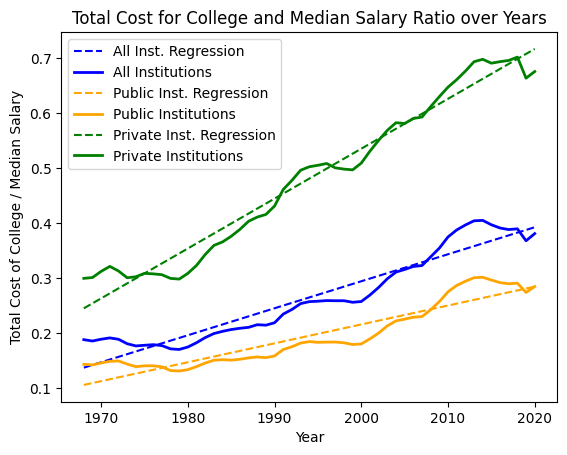

In [21]:
# Creating color labels for each plot
colors = ['blue', 'orange', 'green']

# Creating list for each linear regression formula
models = [model_all_institutions.params, model_public_institutions.params, model_private_institutions.params]

# Plotting data
for idx, df in enumerate(df_college_cost):

    # Plotting linear regression
    plt.plot(
        df['Year'],
        models[idx][1] * df['Year'] + models[idx][0],
        linestyle='--',
        color=colors[idx]
    )

    # PLotting total cost to median ratio
    plt.plot(
        df['Year'],
        df['Total'] / df['Estimate'],
        linewidth=2,
        color=colors[idx]
    )

# Labeling plot
plt.xlabel('Year')
plt.ylabel('Total Cost of College / Median Salary')
plt.title('Total Cost for College and Median Salary Ratio over Years')
plt.legend(['All Inst. Regression', 'All Institutions',
            'Public Inst. Regression', 'Public Institutions',
            'Private Inst. Regression', 'Private Institutions'])

# Displaying plot 
plt.show()

In [22]:
# Modeling linear regression
model = smf.ols(formula='Ratio ~ Year', data=df_college_cost_all[32:]).fit()

print(model_private_institutions.summary())

                            OLS Regression Results                            
Dep. Variable:                  Ratio   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     1444.
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           4.39e-39
Time:                        22:44:22   Log-Likelihood:                 118.16
No. Observations:                  53   AIC:                            -232.3
Df Residuals:                      51   BIC:                            -228.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.5775      0.475    -36.988      0.0

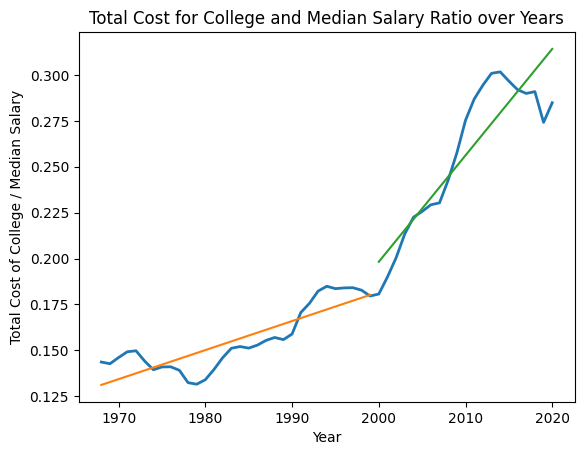

In [23]:
plt.plot(
    df_college_cost_public['Year'],
    df_college_cost_public['Total'] / df_college_cost_public['Estimate'],
    linewidth=2
)

a, b = np.polyfit(
    df_college_cost_public['Year'][:32],
    df_college_cost_public['Total'][:32] / df_college_cost_public['Estimate'][:32],
    deg=1
)

c, d = np.polyfit(
    df_college_cost_public['Year'][32:],
    df_college_cost_public['Total'][32:] / df_college_cost_public['Estimate'][32:],
    deg=1
)

plt.plot(
    df_college_cost_public['Year'][:32],
    a*df_college_cost_public['Year'][:32] + b

)

plt.plot(
    df_college_cost_public['Year'][32:],
    c*df_college_cost_public['Year'][32:] + d

)

plt.xlabel('Year')
plt.ylabel('Total Cost of College / Median Salary')
plt.title('Total Cost for College and Median Salary Ratio over Years')

plt.show()

Communication of Insights Attained